In [1]:
import gym
from src import algo

2022-01-26 15:01:57.686463: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-26 15:01:57.686598: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Simple Maze (3 by 5)

In [2]:
# Creating the environment
from env.SimpleMaze import SimpleMaze
env = SimpleMaze(3,5,True)

Map:
0 * 0 0 0 
0 * 0 0 0 
* 0 0 G X 


In [3]:
# Training an RL agent in the environment using given algorithm
model, agent = algo.dqn(env)

2022-01-26 13:56:51.298674: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 13:56:51.299941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-26 13:56:51.300254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-01-26 13:56:51.300522: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-01-26 13:56:51.300783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Training for 50000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 81s 8ms/step - reward: -1.8356
224 episodes - episode_reward: -81.746 [-4101.000, 35.000] - loss: 18.563 - mse: 244.578 - mean_q: -14.383

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 98s 10ms/step - reward: -1.1130
285 episodes - episode_reward: -39.211 [-1152.000, 35.000] - loss: 36.424 - mse: 900.116 - mean_q: -33.368

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 101s 10ms/step - reward: -1.3448
309 episodes - episode_reward: -43.498 [-4676.000, 37.000] - loss: 34.296 - mse: 687.146 - mean_q: -28.908

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 104s 10ms/step - reward: -1.1464
325 episodes - episode_reward: -33.874 [-1135.000, 37.000] - loss: 30.335 - mse: 487.081 - mean_q: -24.114

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 107s 11ms/step - reward: -1.0068
done, took 490.207 seconds


In [11]:
# Testing the trained RL agent on the environment for one episode
agent.test(env, nb_episodes=1, visualize=True)

Testing for 1 episodes ...

Next action:Move up
Map:
0 * 0 0 0 
* 0 * X 0 
G 0 0 S 0 

Next action:Move left
Map:
0 * 0 0 0 
* 0 X 0 0 
G 0 0 S 0 

Next action:Move up
Map:
0 * X 0 0 
* 0 0 0 0 
G 0 0 S 0 

Next action:Move left
Map:
0 X 0 0 0 
* 0 0 0 0 
G 0 0 S 0 

Next action:Move left
Map:
X 0 0 0 0 
* 0 0 0 0 
G 0 0 S 0 

Next action:Move down
Map:
0 0 0 0 0 
X 0 0 0 0 
G 0 0 S 0 

Next action:Move down
Map:
0 0 0 0 0 
0 0 0 0 0 
X 0 0 S 0 
Episode 1: reward: 39.000, steps: 7


In [12]:
# Generating dataset for ANN to DT conversion
from src.data import dataset
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [02:34<00:00, 645.44it/s]


In [13]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename)

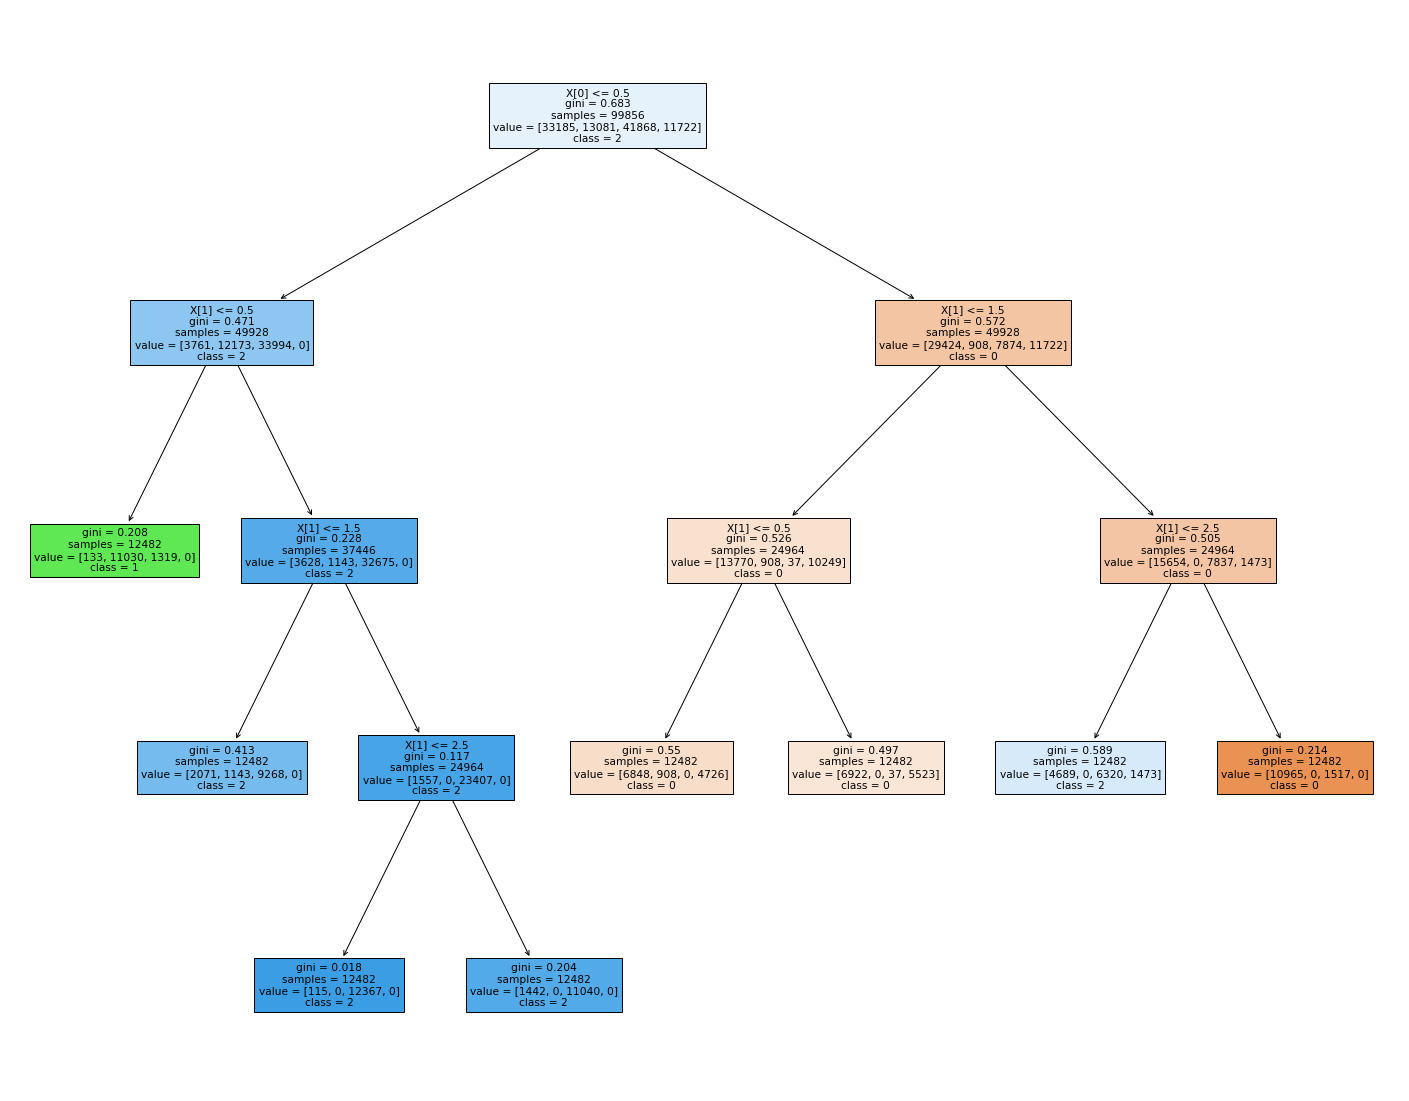

In [14]:
# Visualizing the DT
from src.tree import visualize_tree
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [15]:
# Testing DT against ANN for accuracy
from src.tree import test_tree
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:18<00:00, 538.51it/s]

Instances checked: 10000
Predictions matched: 5700
Accuracy: 57.0%


## Cart-Pole Problem v1

In [2]:
# Creating the environment
env = gym.make("CartPole-v1")

/usr/local/lib/python3.9/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
# Training an RL agent in the environment using given algorithm
model, agent = algo.dqn(env)

2022-01-26 15:02:33.920837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 15:02:33.922091: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:
2022-01-26 15:02:33.922417: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:
2022-01-26 15:02:33.922695: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cann

Training for 50000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 81s 8ms/step - reward: 1.0000
90 episodes - episode_reward: 109.744 [10.000, 343.000] - loss: 1.594 - mse: 1130.815 - mean_q: 41.922

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 93s 9ms/step - reward: 1.0000
40 episodes - episode_reward: 253.000 [196.000, 412.000] - loss: 2.572 - mse: 3999.938 - mean_q: 86.015

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 95s 9ms/step - reward: 1.0000
34 episodes - episode_reward: 287.912 [211.000, 500.000] - loss: 1.567 - mse: 4527.676 - mean_q: 89.252

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 101s 10ms/step - reward: 1.0000
23 episodes - episode_reward: 431.217 [253.000, 500.000] - loss: 1.555 - mse: 4407.334 - mean_q: 88.361

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 103s 10ms/step - reward: 1.0000
done, took 473.287 seconds


In [5]:
# Testing the trained RL agent on the environment for one episode
agent.test(env, nb_episodes=5, visualize=True)
env.close()

Testing for 5 episodes ...
Episode 1: reward: 191.000, steps: 191
Episode 2: reward: 194.000, steps: 194
Episode 3: reward: 190.000, steps: 190
Episode 4: reward: 186.000, steps: 186
Episode 5: reward: 184.000, steps: 184


In [35]:
# Generating dataset for ANN to DT conversion
from src.data import dataset
filename = "cart_pole_v1_data.csv"
dataset(env,model,filename,10)

100%|██████████████████████████████████████| 1296/1296 [00:02<00:00, 604.95it/s]


In [6]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,5)

In [ ]:
# Visualizing the DT
from src.tree import visualize_tree
plt = visualize_tree(env,Tree)
plt.savefig("cart_pole_v1.png")

In [ ]:
# Testing DT against ANN for accuracy
from src.tree import test_tree
test_tree(env,model,Tree,31830)